###Import de Recursos e suas respectivas configurações

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

sns.set()

In [87]:
plt.ion()
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (15,9)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

#Visualização dos dados

Primeiramente, vamos observar se o nosso conjunto de dados foi carregado adequadamente

In [88]:
happiness = pd.read_csv('https://raw.githubusercontent.com/BernnardoSBO/ICD-TrabalhoFinal/master/databases/world-happiness-clean.csv')
happiness.head()

,Nome do País,Nota para Escada de Cantril,Log do PIB per capita,Suporte Social,Expectativa de Vida Saúdavel,Liberdade para Escolhas da Vida,Generosidade,Percepção de Corrupção,Ano
0,Afghanistan,4.758,7.647,0.539,51.6,0.600,0.121,0.707,2010
1,Albania,5.269,9.303,0.733,66.4,0.569,-0.172,0.726,2010
2,Argentina,6.441,10.066,0.927,67.3,0.730,-0.126,0.855,2010
3,Armenia,4.368,9.136,0.660,65.2,0.459,-0.176,0.891,2010
4,Australia,7.450,10.722,0.955,72.2,0.932,0.317,0.366,2010


Começando a nossa visualização/análise exploratória, vamos plotar um histograma contendo a média da felicidade entre os países durante cada ano

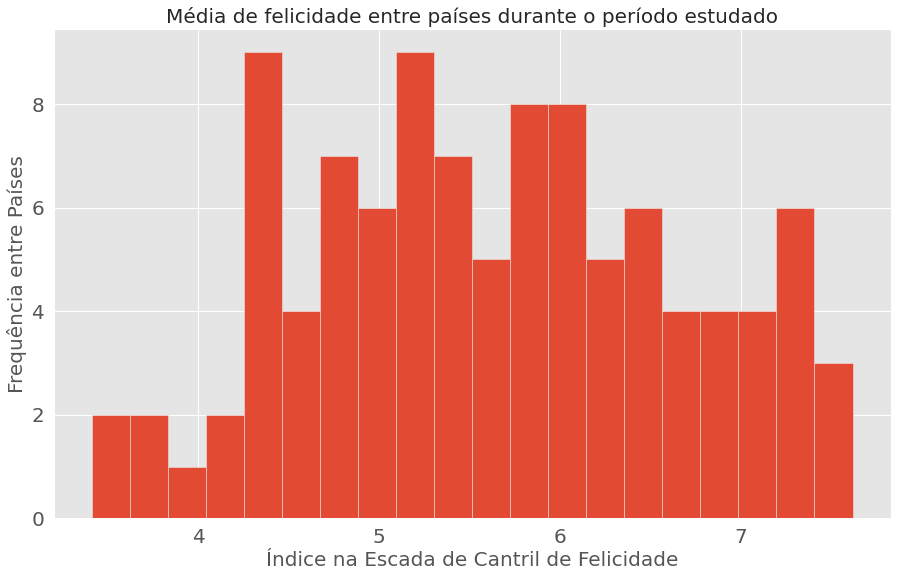

In [89]:
hpn_mean = happiness.groupby('Nome do País').mean()


plt.hist(hpn_mean['Nota para Escada de Cantril'], bins=20)
plt.title('Média de felicidade entre países durante o período estudado')
plt.xlabel('Índice na Escada de Cantril de Felicidade')
plt.ylabel('Frequência entre Países')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


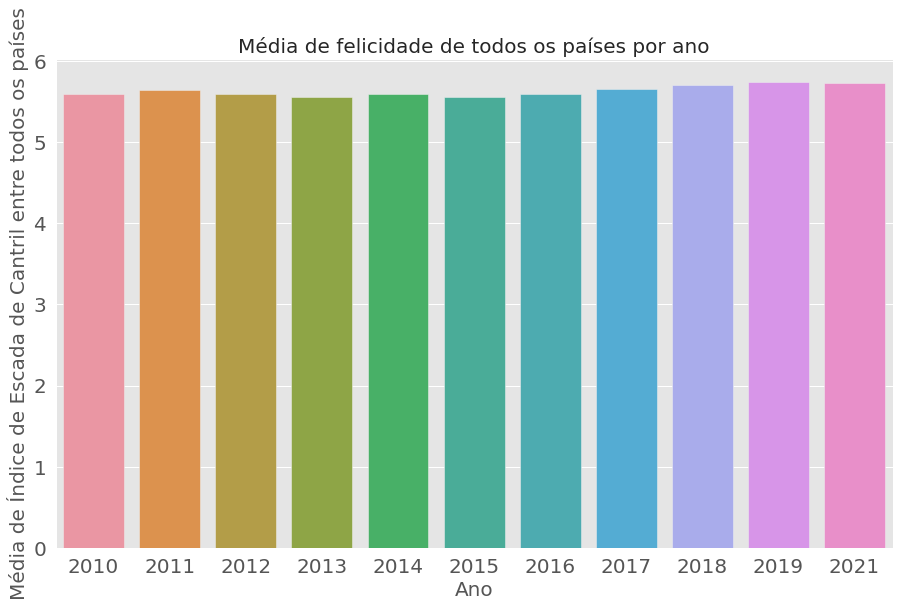

In [90]:
#média de felicidade a cada ano
h_mean_year = happiness.groupby('Ano').mean().reset_index()

sns.barplot(h_mean_year['Ano'], h_mean_year['Nota para Escada de Cantril'])
plt.title('Média de felicidade de todos os países por ano')
plt.ylabel('Média de Índice de Escada de Cantril entre todos os países')
plt.show()

##Distribuições de cada parâmetro a cada ano

Agora, vamos implementar uma função com o objetivo de visualizarmos o comportamento de cada parâmetro existente em nossa tabela ao passar dos anos.
Vamos imprimir para cada parâmetro uma comparação de seus estimadores com o passar dos anos.Iremos também plotar a distribuição de cada ano para esse valor, favorecendo nossa visualização. Além disso, plotaremos os boxplots para conferirmos como os valores estão espalhados a cada ano.

In [10]:
def roundPartial(value, res):
  return round(value/res) * res

In [65]:
#função de plt de atributos por ano
anos = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021]


def plotPropYear (df, col):
  description = pd.DataFrame()

  for i in anos:
    df_aux = df[df['Ano']==i]
    description = pd.concat([description, df_aux[col].describe()], axis=1)
  
  description.columns = [anos]

  display(description)

  print('\n')
  j = [3,4]
  l = 1
  fig = plt.figure(figsize=(22,9))
  fig.suptitle('Histograma\n'+col, fontsize=25, y=1.05)
  maxValue = df[col].max()
  minValue = df[col].min()
  step = maxValue*0.1
  roundedStep = roundPartial(step,0.100)

  for i in anos:
    df_aux = df[df['Ano']==i]
    plt.subplot(j[0],j[1],l).xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    l += 1
    plt.hist(df_aux[col], bins=15)
    plt.title(str(i),fontsize=18, y=1, x=0.2)
    plt.yticks(range(0,32,4),fontsize = 12)
    scale = np.arange(minValue, maxValue, roundedStep)
    plt.xticks(scale,fontsize = 12)
  
  
  plt.subplots_adjust(left=0.1,
                    bottom=-0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)  
  plt.show()

  fig2 = plt.figure(figsize=(22,5))
  sns.boxplot(x='Ano', y=col, data=df)
  fig2.suptitle("Boxplot\n"+col, fontsize=25, y=1.05)
  plt.show()

In [62]:
params = happiness.columns[1:8]

In [63]:
def print_title(str):
  print('\n\n')
  length = len(str)
  for i in range(2*length):
    print('_', end='', sep='')
  print('\n\n')
  for i in range(int(length - length/2)):
    print(' ', end='', sep='')
  print(str,'\n')
  for i in range(2*length):
    print('_', end='', sep='')

  print('\n')




______________________________________________________


             Nota para Escada de Cantril 

______________________________________________________



,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,5.593000,5.636686,5.594402,5.550000,5.595275,5.557588,5.586980,5.659647,5.705049,5.739588,5.725088
std,1.129588,1.091612,1.069410,1.169958,1.091166,1.040550,1.045207,1.086292,1.050327,1.079029,1.031377
min,3.229000,3.520000,3.669000,3.326000,3.131000,2.983000,2.903000,2.662000,2.694000,2.375000,2.523000
25%,4.672250,4.849500,4.721000,4.714750,4.825750,4.850000,4.821500,4.873750,5.071250,5.006750,5.077500
50%,5.520000,5.393000,5.578000,5.509000,5.612000,5.558000,5.563500,5.711000,5.806500,5.936000,5.842500
75%,6.402750,6.610750,6.390750,6.482250,6.464250,6.386250,6.349000,6.338250,6.387000,6.449500,6.416250
max,7.771000,7.788000,7.560000,7.594000,7.508000,7.514000,7.660000,7.788000,7.858000,7.780000,7.842000


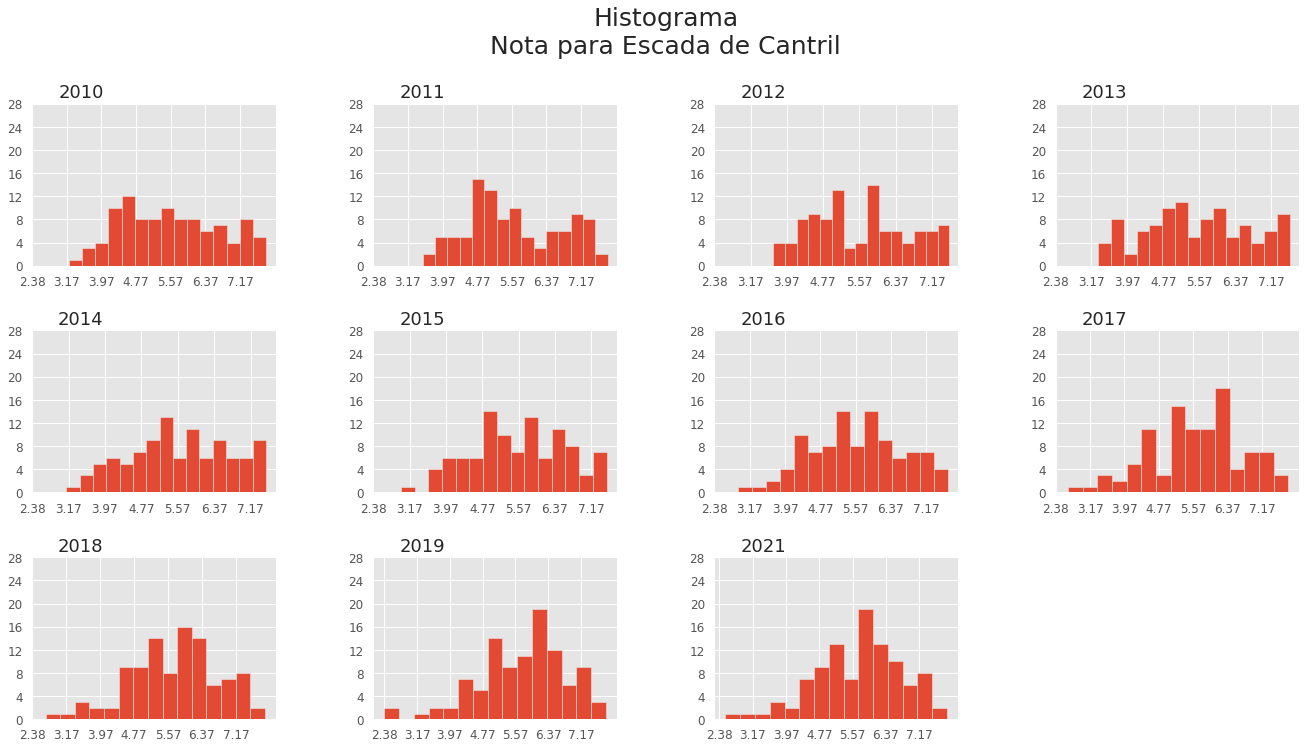

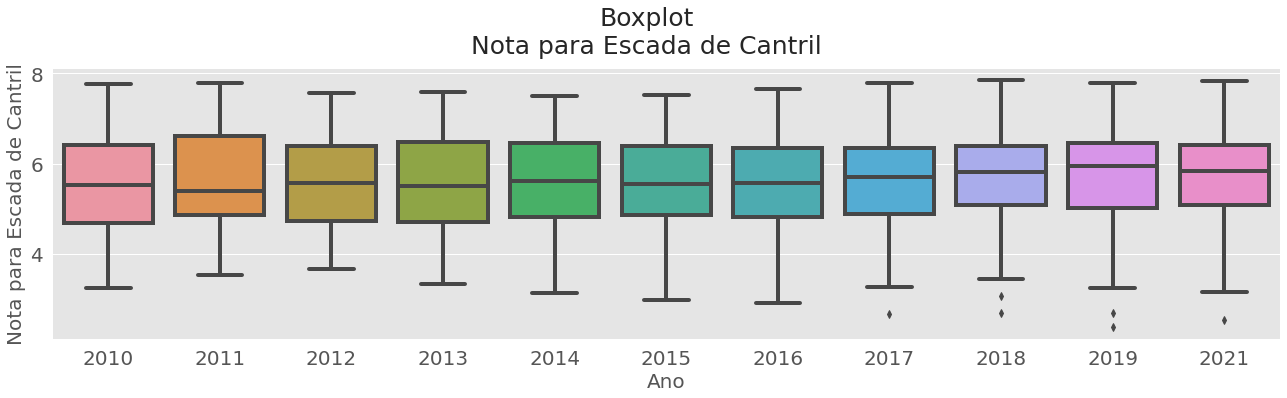




__________________________________________


          Log do PIB per capita 

__________________________________________



,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,9.452794,9.480431,9.498059,9.518598,9.536971,9.549912,9.566735,9.591000,9.621993,9.639542,9.614157
std,1.054401,1.049866,1.036036,1.028711,1.026708,1.034222,1.036919,1.039076,1.028162,1.026583,1.032122
min,6.941000,6.925000,6.987000,7.002000,7.027000,7.030000,7.047000,7.058000,7.087000,7.106000,7.098000
25%,8.572750,8.615500,8.658500,8.702250,8.749500,8.801500,8.852500,8.907500,8.961000,9.010000,8.991250
50%,9.572500,9.589500,9.618500,9.652500,9.617000,9.628500,9.663500,9.665500,9.666500,9.699500,9.683000
75%,10.406250,10.365750,10.370500,10.366750,10.385750,10.411500,10.440500,10.489000,10.528000,10.551750,10.521500
max,11.592000,11.595000,11.567000,11.580000,11.598000,11.617000,11.640000,11.634000,11.645000,11.648000,11.647000


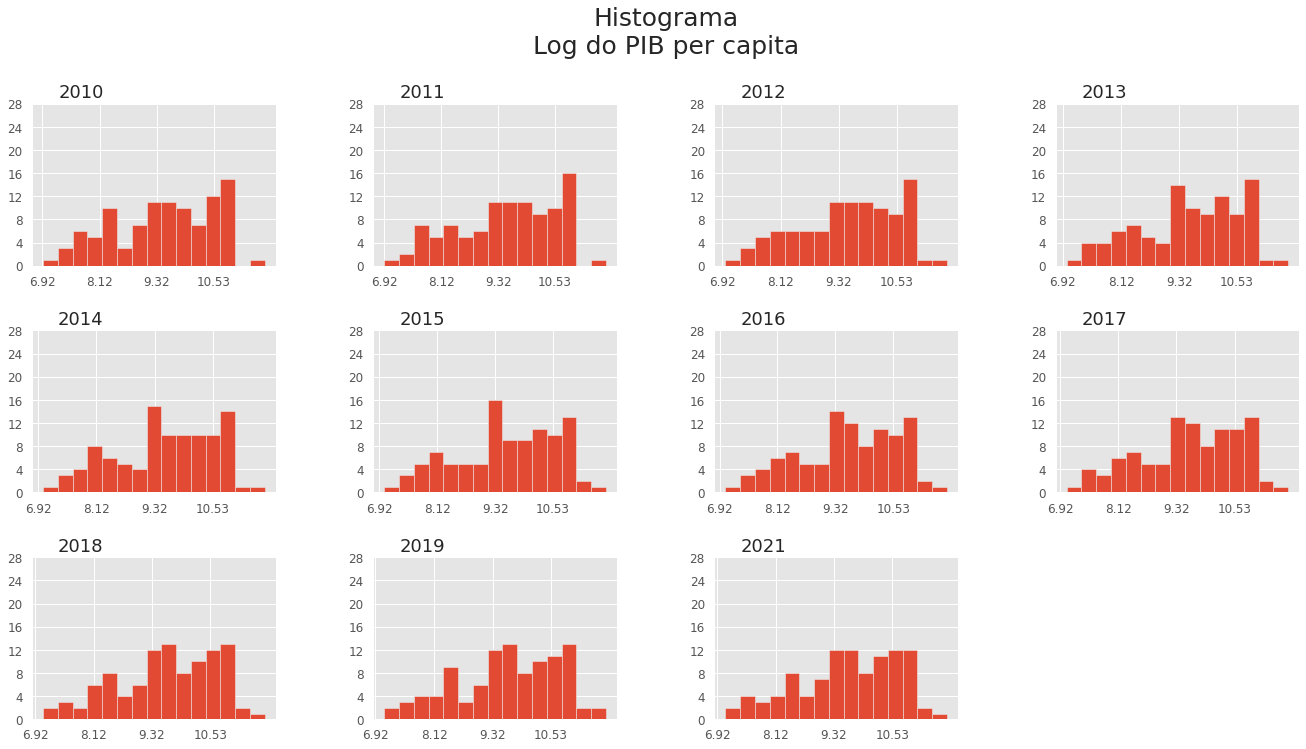

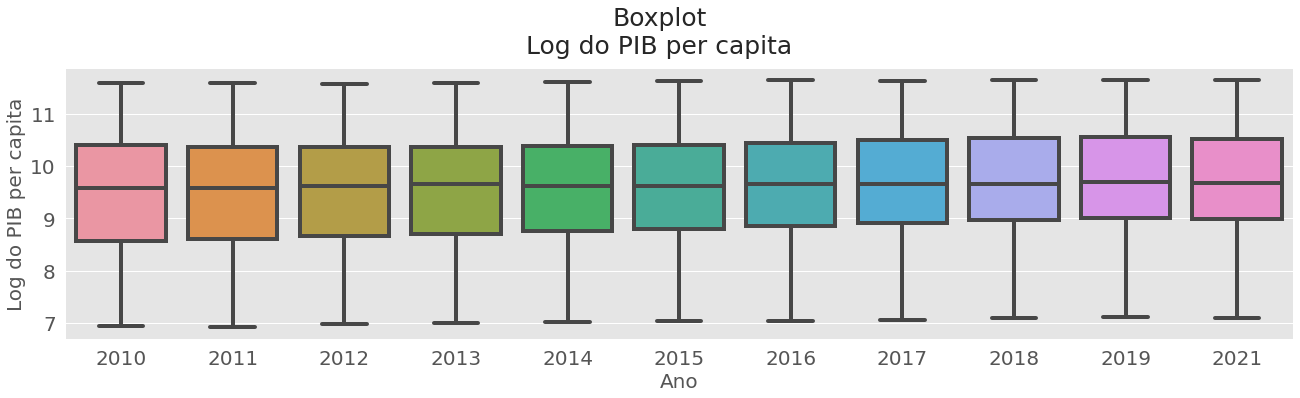




____________________________


       Suporte Social 

____________________________



,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.834941,0.828882,0.822647,0.823294,0.826999,0.824686,0.837422,0.829947,0.838892,0.838696,0.838284
std,0.101806,0.104225,0.105992,0.103733,0.100212,0.102996,0.098069,0.098162,0.092764,0.100756,0.094514
min,0.539000,0.503000,0.511000,0.484000,0.526000,0.517000,0.533000,0.491000,0.508000,0.420000,0.463000
25%,0.773000,0.759000,0.764750,0.759250,0.782250,0.766500,0.792500,0.775500,0.795750,0.783250,0.799000
50%,0.859500,0.858500,0.835500,0.831000,0.849000,0.842000,0.868500,0.846000,0.855000,0.871500,0.857500
75%,0.913500,0.910750,0.906000,0.910000,0.903500,0.906750,0.911750,0.908500,0.910000,0.914250,0.909500
max,0.976000,0.977000,0.962000,0.965000,0.968000,0.987000,0.958000,0.964000,0.962000,0.964000,0.954000


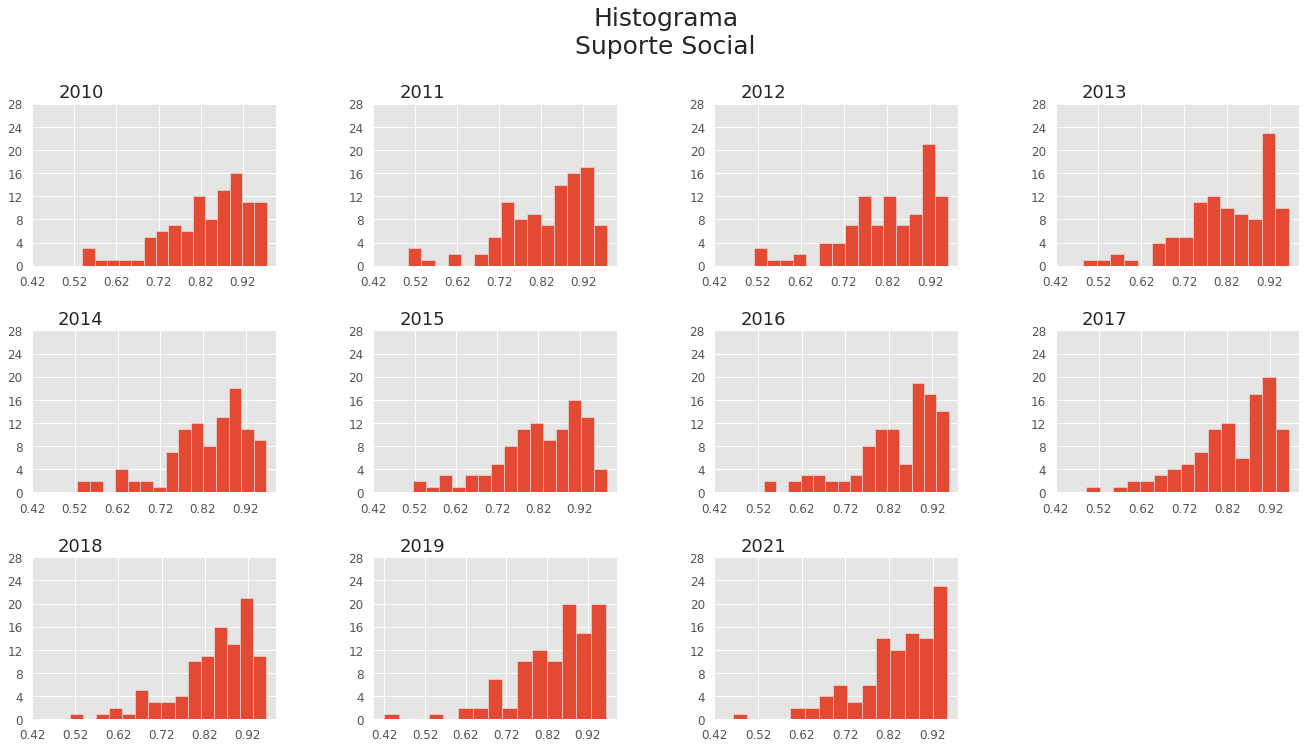

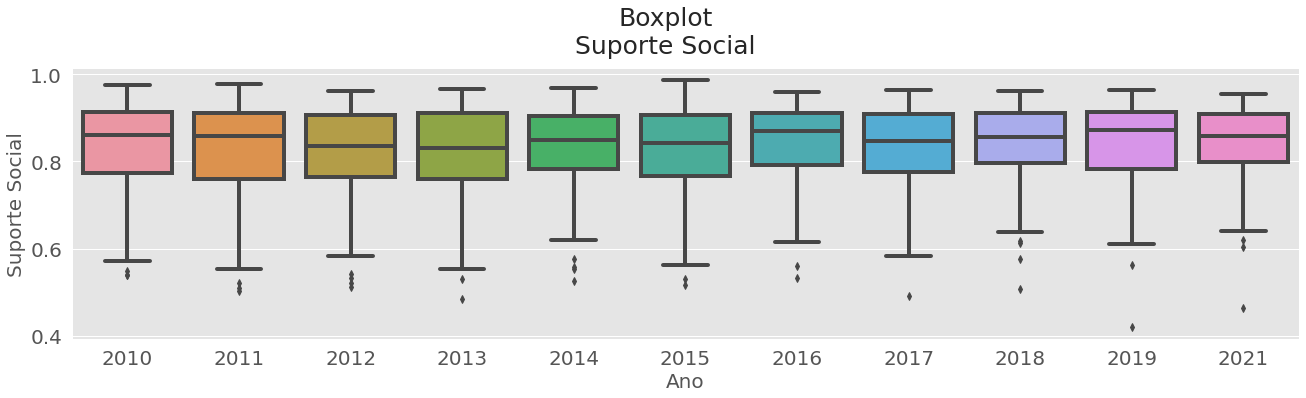




________________________________________________________


              Expectativa de Vida Saúdavel 

________________________________________________________



,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,63.990833,64.235725,64.480529,64.725147,64.969569,65.213804,65.508706,65.803588,66.098549,66.393500,66.352794
std,6.861552,6.717325,6.576733,6.440018,6.307439,6.179277,6.081075,5.987972,5.900200,5.818006,5.852442
min,45.100000,45.420000,45.740000,46.060000,46.380000,46.700000,47.200000,47.700000,48.200000,48.700000,48.478000
25%,60.775000,61.175000,61.575000,61.975000,62.300000,62.725000,63.075000,63.425000,63.653250,64.000000,63.984000
50%,65.350000,65.570000,65.710000,65.840000,65.990000,66.200000,66.400000,66.650000,67.100000,67.350000,67.316500
75%,69.125000,69.310000,69.495000,69.530000,69.565000,69.600000,69.675000,69.750000,70.125000,70.600000,70.599250
max,73.800000,73.980000,74.160000,74.340000,74.520000,74.700000,74.800000,74.900000,75.000000,75.100000,75.100000


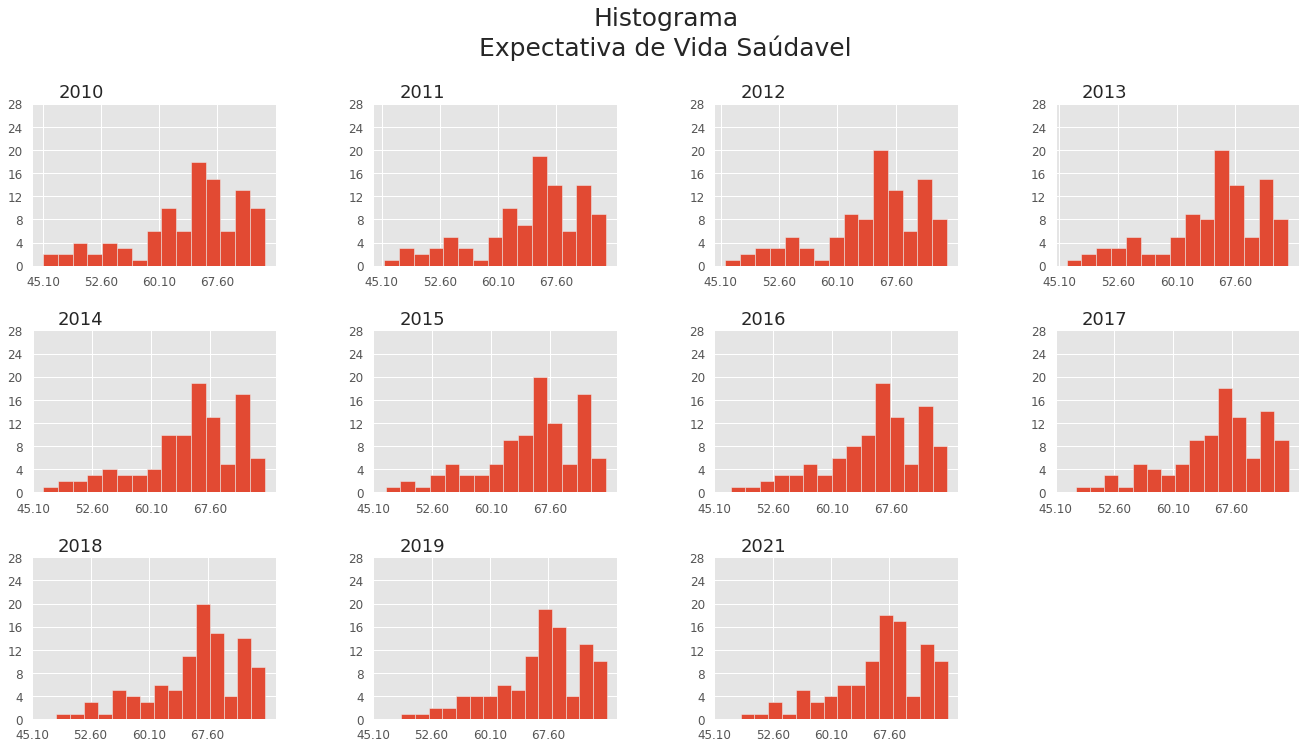

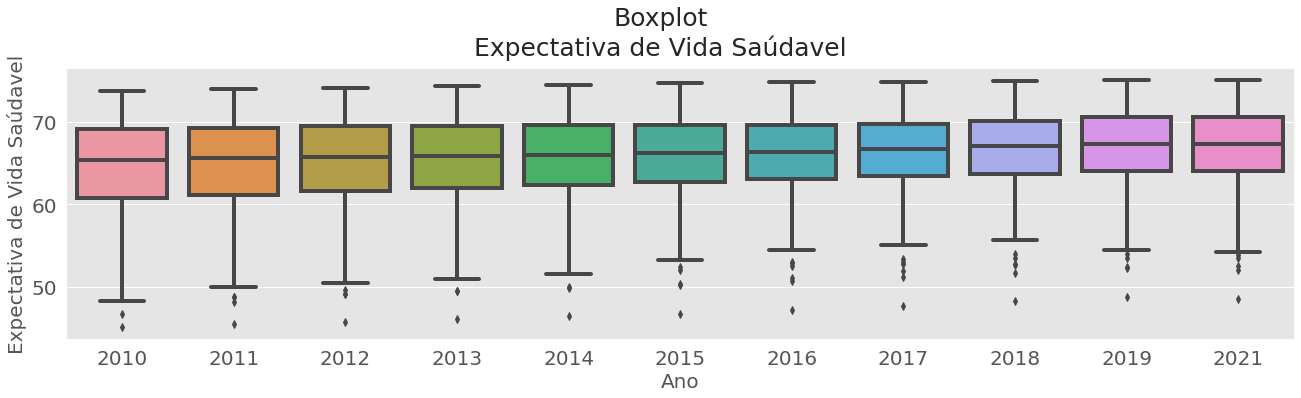




______________________________________________________________


               Liberdade para Escolhas da Vida 

______________________________________________________________



,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.713726,0.743431,0.714569,0.730382,0.741798,0.750360,0.761203,0.783265,0.792465,0.802593,0.800324
std,0.145942,0.150891,0.149904,0.140373,0.142756,0.137495,0.127166,0.128778,0.116868,0.111189,0.109539
min,0.364000,0.333000,0.367000,0.390000,0.369000,0.389000,0.458000,0.427000,0.374000,0.394000,0.382000
25%,0.598500,0.631250,0.609000,0.642000,0.649750,0.640250,0.661500,0.695000,0.726000,0.725250,0.743750
50%,0.738500,0.774500,0.703500,0.739000,0.737000,0.773000,0.773000,0.813500,0.816000,0.824500,0.822000
75%,0.822250,0.866750,0.848500,0.844750,0.864750,0.860750,0.869750,0.889000,0.877000,0.885750,0.878500
max,0.961100,0.962000,0.956000,0.950000,0.954000,0.980000,0.984000,0.985000,0.970000,0.970000,0.970000


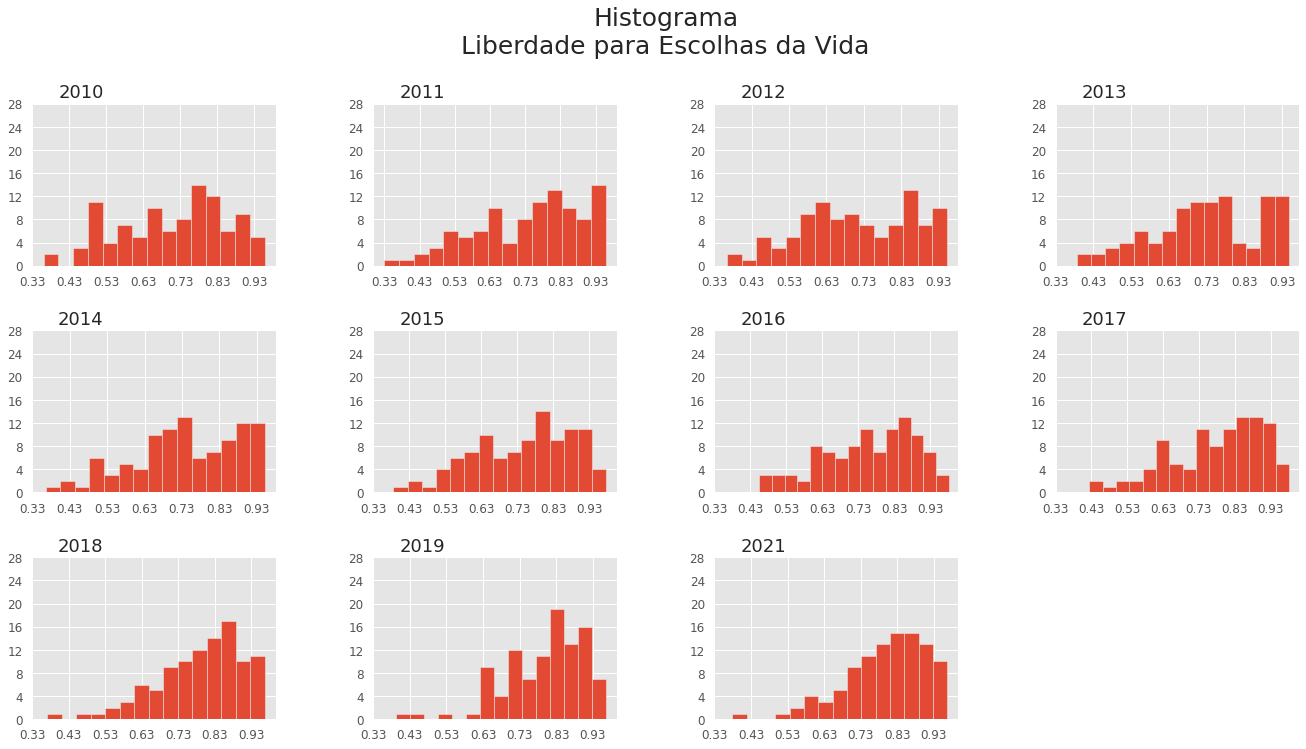

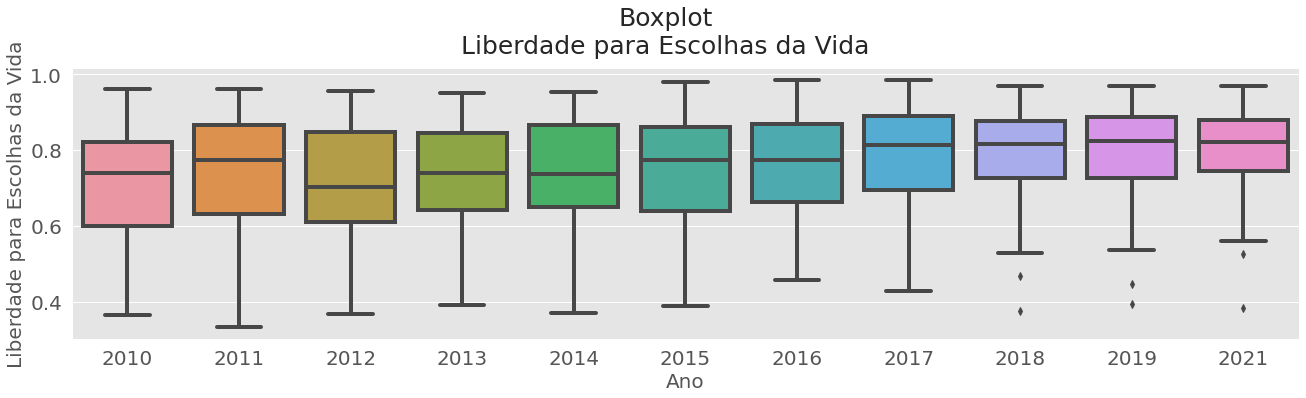




________________________


      Generosidade 

________________________



,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.000598,-0.020735,-0.015640,-0.015484,0.013143,0.005657,-0.008216,-0.023507,-0.042699,-0.039121,-0.034951
std,0.167731,0.170814,0.161142,0.161977,0.165670,0.160783,0.149202,0.151800,0.150110,0.150152,0.143940
min,-0.303000,-0.316000,-0.305000,-0.289000,-0.288000,-0.272000,-0.266000,-0.290000,-0.335000,-0.289000,-0.288000
25%,-0.121500,-0.146750,-0.139500,-0.129750,-0.103000,-0.113250,-0.100000,-0.147000,-0.150750,-0.140000,-0.144250
50%,-0.031500,-0.047000,-0.035000,-0.050500,-0.008000,-0.034500,-0.042500,-0.054000,-0.071000,-0.072500,-0.069500
75%,0.091750,0.049500,0.069250,0.059250,0.105500,0.105750,0.087500,0.085750,0.053750,0.059250,0.041750
max,0.536000,0.438000,0.380000,0.456000,0.553000,0.471000,0.500000,0.488000,0.512000,0.555000,0.542000


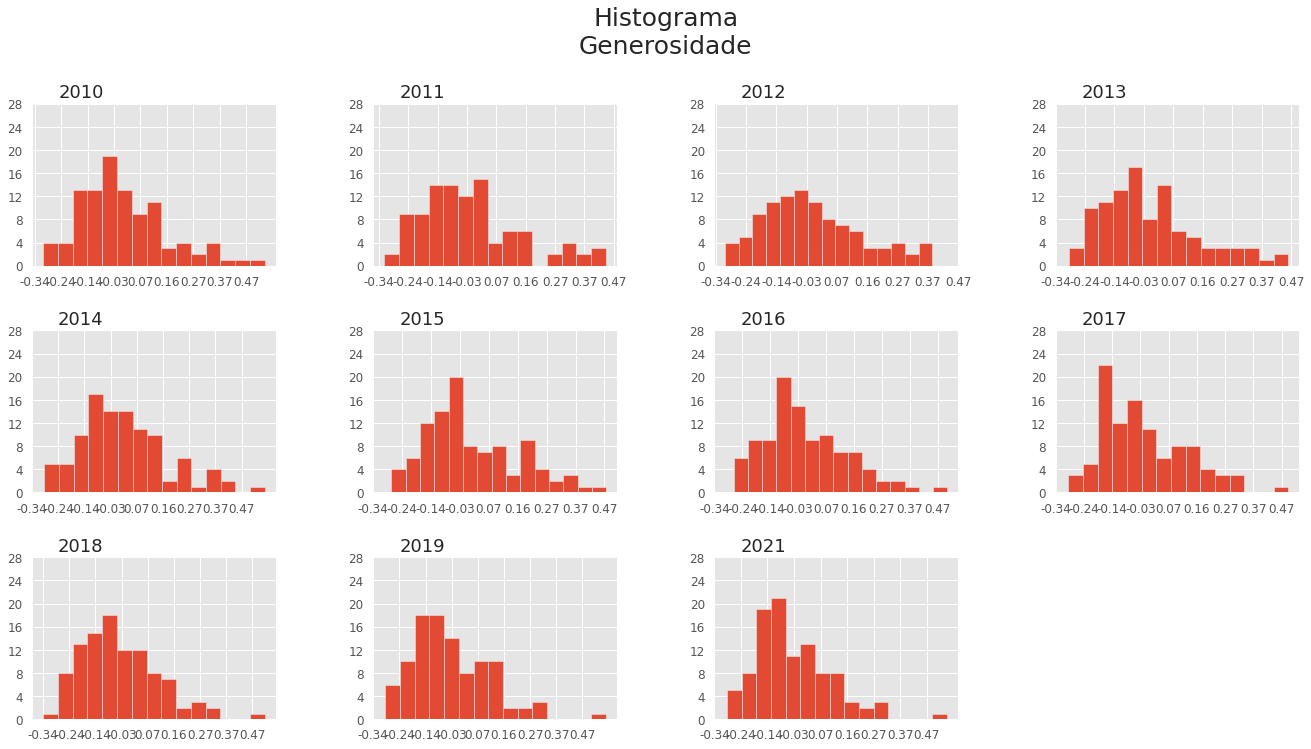

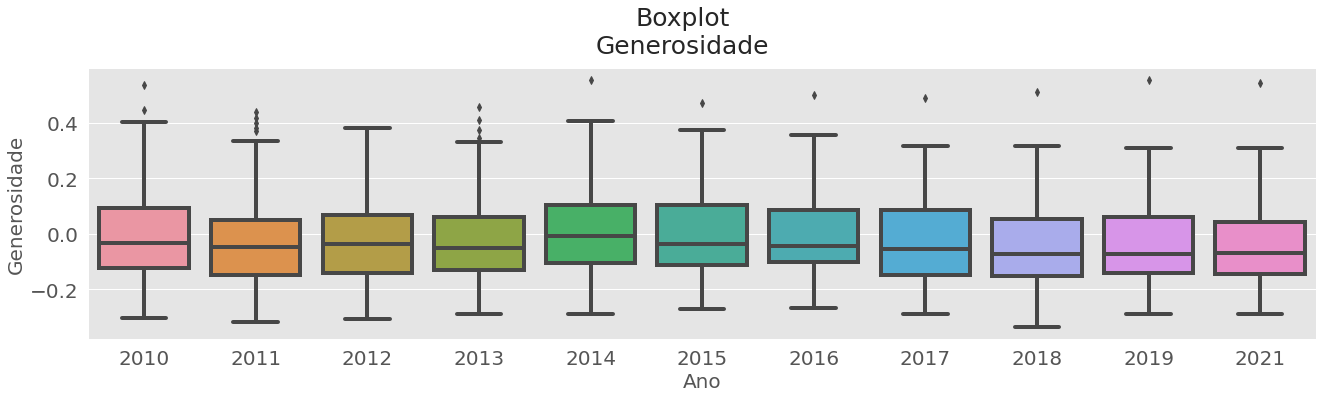




____________________________________________


           Percepção de Corrupção 

____________________________________________



,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.765552,0.762258,0.767856,0.763101,0.750723,0.748017,0.754468,0.735307,0.741547,0.730015,0.733627
std,0.175147,0.177117,0.175063,0.175604,0.178266,0.182380,0.176186,0.179804,0.177870,0.178709,0.175472
min,0.175000,0.220000,0.187000,0.170000,0.237000,0.186000,0.210000,0.181000,0.151000,0.174000,0.179000
25%,0.698250,0.702250,0.707750,0.694250,0.671750,0.694250,0.702750,0.675000,0.702000,0.674500,0.668500
50%,0.811500,0.798500,0.816000,0.815500,0.804000,0.810000,0.811000,0.790500,0.800000,0.786500,0.797500
75%,0.888500,0.892500,0.890750,0.895000,0.880250,0.866500,0.876000,0.860500,0.854250,0.856250,0.847250
max,0.983000,0.977000,0.962000,0.973000,0.976000,0.962000,0.969000,0.954000,0.952000,0.963000,0.939000


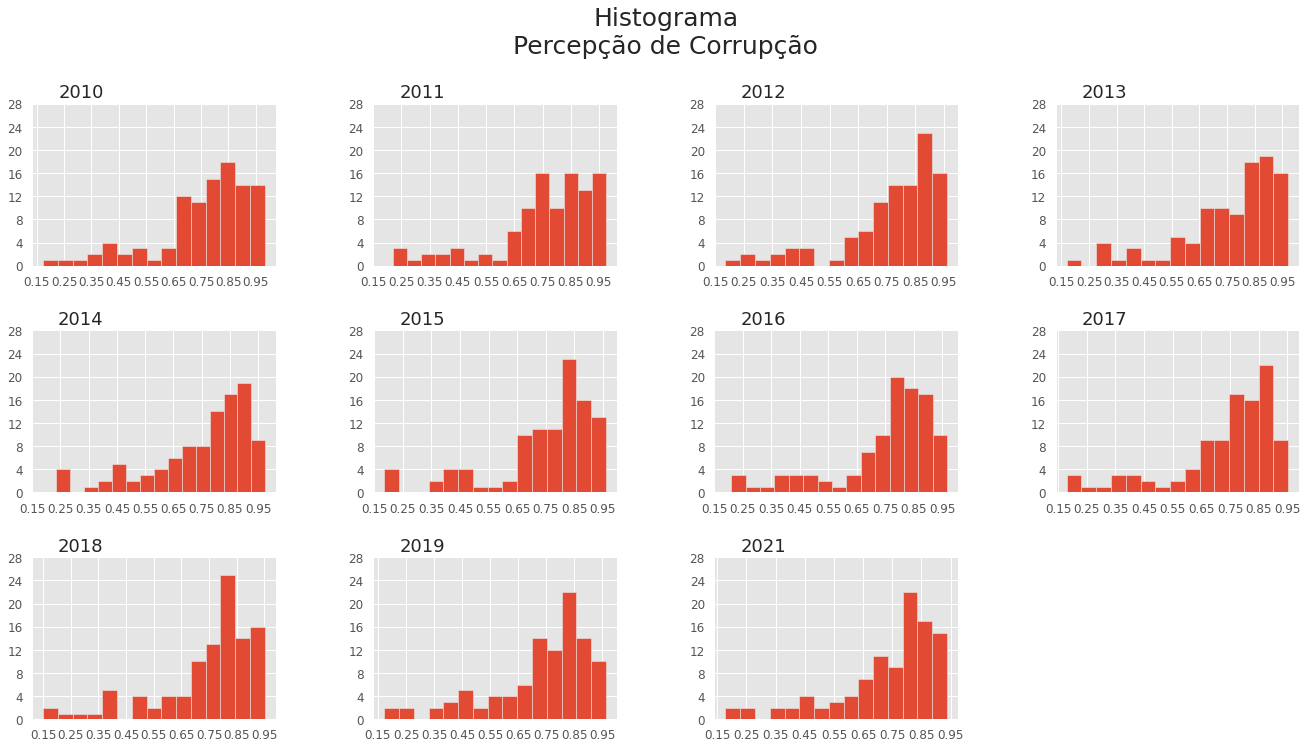

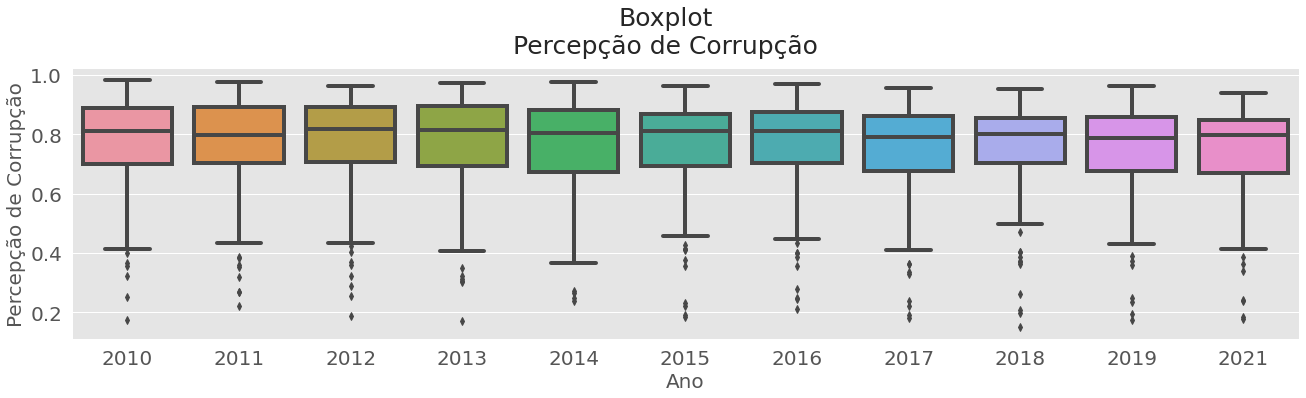

In [66]:
for i in params:
  print_title(i)
  plotPropYear(happiness, i)

##Observações


<p>A partir da visualização dos histogramas, boxplots e da descrição anual de cada paramêtro, conseguimos perceber os seguintes acontecimentos</p>
<ul>
<li>
A <b>Nota para Escada de Cantril</b>, parâmetro utilizado como representante da felicidade, apresenta uma constância na sua média mas uma redução em sua variância
</li>
<li>
O <b>Log do PIB per capita</b> variou pouco, entretanto, por se tratar de um log do valor real, essa pouca variação é esperada, enquanto na realidade a variação do PIB per capita deva ser maior
</li>
<li>
O <b>Suporte Social</b> manteve seu valor médio constante, próximo ao valor máximo da escala, no entanto apresentou uma menor variânia com o passar dos anos, sugeringo que o Suporte Social dos países estejam melhorando no geral por se concentrarem mais no topo.
</li>
<li>
A <b>Expectativa de Vida</b> obteve um aumento considerável, de 3 anos em sua média, isso com a variância diminuindo.
</li>
<li>
A <b>Liberdade para Escolhas da Vida</b> apresentaram um grande aumento com o passar do tempo, tendo sua média aumentada em cerca de 15% no período analizado, isso com a variância também diminuindo

</li>
<li>
A <b>Generosidade</b> apresentou como padrão para o seu valor médio uma variação que lembra uma senoide, enquanto a variância se manteve quase que constante.
</li>
<li>
A <b>Percepção de Corrupção</b> apresentou um decresimento bem sútil em seu valor médio com o passar dos anos, com uma variância que se manteve constante durante os estudos
</li>
</ul>

#Correlação entre a variável de interesse e as outras variáveis

A fim de olharmos como cada parâmetro influência na nota de felicidade, iremos plotar um gráfico contendo a correlação de cada parâmetro com o parâmetro de interesse

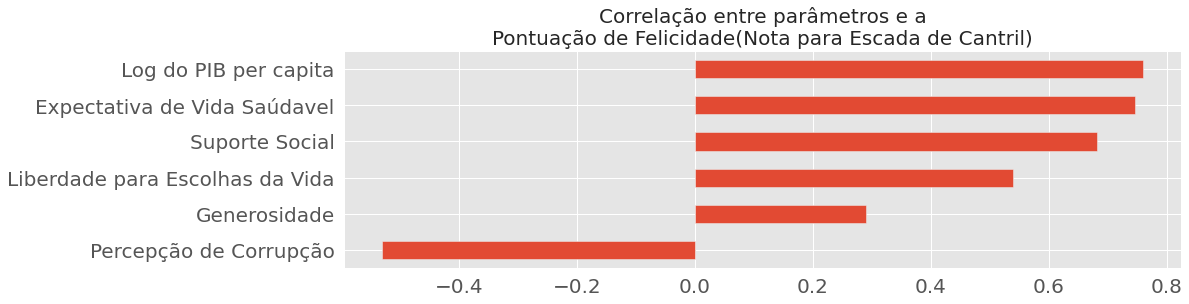

In [77]:
matriz_de_corr = happiness[params].corr()

corr = matriz_de_corr['Nota para Escada de Cantril'].drop(['Nota para Escada de Cantril'])

fig = plt.figure(figsize=(15,4))
plt.title('Correlação entre parâmetros e a\nPontuação de Felicidade(Nota para Escada de Cantril)')
corr.sort_values(ascending=True).plot(kind='barh')
plt.show()

<p>A correlação entre os parâmetros e a variável de interesse apresentam um comportamento esperado, uma vez que características consideradas "positivas" se correlacionam positivamente com o grau de felicidade, enquanto aquela considerada "negativa" se correlaciona de maneira negativa. </p>

#Correlação entre todas as variáveis

Além de olharmos a correlação entre todas as variáveis com a variável de interesse, também é interessante saber como as variáveis se relacionam entre sí.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

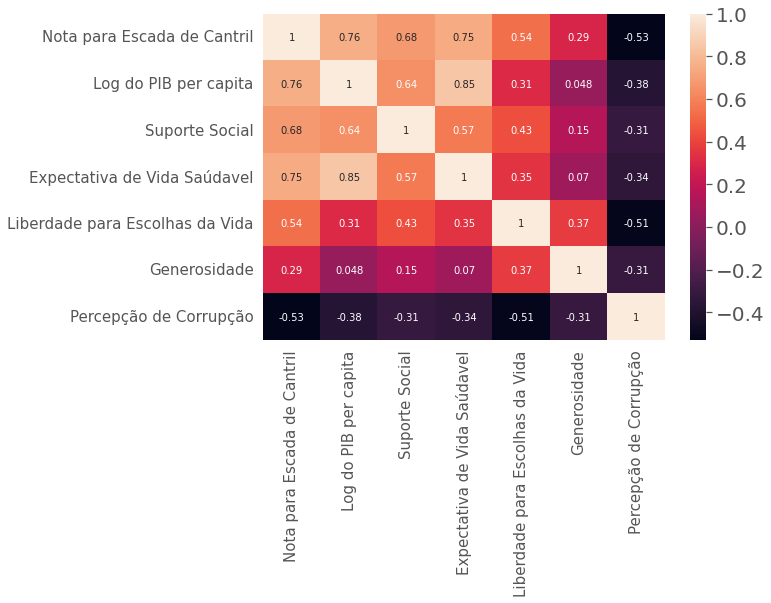

In [84]:
fig = plt.figure(figsize=(9,6))
sns.heatmap(matriz_de_corr, annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Aqui, podemos notar a forte correlação que alguns parâmetros possuêm uns com os outros. Um exemplo é como a correlação positiva é forte entre:
<ul><li>O Log do PIB per capita e os parâmetros Nota para Escada de Cantril (0.76) e Expectativa de Vida Saudável (0.85).</li></ul>

Enquanto isso, uma correlação negativa forte é está estabelecida entre:
<ul><li>A Percepção de Corrupção e as propriedades Nota para Escada de Cantril(-0.53) e Liberdade de Expressão(-0.51).</li></ul>

#Conclusão

<p>Podemos concluir a partir de nossa análise exploratória que não existem grandes variações nos estimadores de nossos dados, tendo ainda por cima uma baixa quantidade de outliers nesses parâmetros. As variações dos estimadores parecem seguir funções continuas e com baixa variância.
</p>
<br/>
<p>Além disso, é possível perceber através do estudo das correlações de que existem estimadores que se correlacionam diretamente com a variável de interesse.</p>
<br/>
<p>
Com essas conclusões, podemos considerar que existe uma regressão não muito complexa que pode ser obtida com o uso dos parâmetros utilizados.
</p>